# Bike Rending Assignment 


   

## EDA Process

**Steps I'm going to do:**

    import Libraries
    Loading Data
    Get to know how the data looks like
    Data type Check
    Data cleaning 
    Creating dummy variable
    Visualizing data

**Basic Operation**

In [1]:
#Import Libraries

#For EDA Process
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

#For modelling Purpose
#For spliting data and scaling data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Stats model for modelling the variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Import the stats model apis
import statsmodels.api as sm

#Test R^2
from sklearn.metrics import r2_score

#Ignoring the Warning
import warnings  
warnings.filterwarnings('ignore') 

**Loading DataSet**

      Here I'm hoing to load the required data for my analsis

      

In [2]:
#Loading DataSet with  pandas library

dataFrame=pd.read_csv("/home/mohamed/Documents/Data Analytics/day.csv")

#Checking the type of data
dataFrame.shape

(730, 16)

In [3]:
#Checking how data looks like
dataFrame.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Summarize the dataSet 
#Here I'm using the Pandas describe function

dataFrame.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
#Checking dataType
dataFrame.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In Basic Operation I've found some basic information

**Those Are:**

-> The Dataset contain 730 rows(different dates) and 16 Columns(values for Rows)

-> In Column section there is only one string type,and that columns contains date as the values

-> All other datas are integer or float type

    

#### Checking missing and outlier values
  
    In this section i'm checking ,is there any column contain missing values

    And checking the distribution for numerical columns for checking the outliers


In [6]:
#Using the info() fuction in pandas to check the missing values
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


I found there is No columns contains empty of null values

So,I don't have any work to do filling or deleteing the missing values

I go further Operation


In [7]:
#Checking for duplicates duplicated() function

dataFrame.duplicated(subset = None, keep = 'first')


0      False
1      False
2      False
3      False
4      False
       ...  
725    False
726    False
727    False
728    False
729    False
Length: 730, dtype: bool

I found there is no duplicate in rows

There is no need to handle that,so i go further

In [8]:
#Checking dataset

dataFrame.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### **Removing Unwanted Columns**

The columns which i'm going to remove:

    Instant:
        This column act as index number but i already have the index by dataFrame itself
    casual:
        This column contains total number of user use the service without register
    registerd:
        This column contains total number of registered user use the service
    
    dteday:
    
        Already we have the separate columns for month,year,weekday,So i found i Have No use of this




In [9]:
#dropping the columns which i dont want
newDataFrame=dataFrame.drop(columns=["casual","instant","registered","dteday"])
newDataFrame

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [10]:
#Checking the info
newDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [11]:
#Descriptive statistics
newDataFrame.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [13]:
newDataFrame

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


#### Creating dummy variable

I found some columns like 
    season
    weathersit
    month
    weekday

The above columns are consider as categorical variable,So,i'm going to create dummy variable with above columns

Im creating the dummy variable with one not encoding method

In [14]:
#Getting dummy variable with get_dummies() function from the pandas
pd.get_dummies(newDataFrame)


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [15]:
#Checking Data type of variable
newDataFrame[["season","yr","mnth","weathersit"]].dtypes

season        int64
yr            int64
mnth          int64
weathersit    int64
dtype: object

While try to create new dummy variable,the get_dummies() method doesn't return any dummy variable because those category variables are in int type,in Machine learning if we want to split the variable by category that time those values shoukd be in category

So, i'm going to change integer values in object type

For below columns

    season
    yr	
    mnth
    weathersit

In [16]:
#Changing ang assigning the type of variable
newDataFrame.loc[:,["season","yr","mnth","weathersit",'weekday']]=newDataFrame[['weekday',"season","yr","mnth","weathersit"]].astype(np.str)


In [17]:
#Checking data types
newDataFrame[["season","yr","mnth","weathersit",'weekday']].dtypes

season        object
yr            object
mnth          object
weathersit    object
weekday       object
dtype: object

In [18]:
newDataFrame.dtypes

season         object
yr             object
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

**Now, all the columns which i'm going to create dumm variable are in string format**

So,it is easy to create dummy variables

In [19]:
#Creating dummies
dummies=pd.get_dummies(newDataFrame[["season","yr","mnth","weathersit",'weekday']])

In [20]:
#seeing the dummy data
dummies

,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,mnth_10,mnth_11,mnth_12,...,weathersit_1,weathersit_2,weathersit_3,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,1,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
726,1,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
727,1,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
728,1,0,0,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0


**Dummy trap:**

For better performance we need to drop one of columns in each category of columns because to avoid multicollinearity that is called Dummy trap

Dropping variables are:

    mnth_1
    season_1
    weathersit_1
    yr_0





In [21]:
#Dropping columns in dummy variables in each category of dummy variable
dummies.drop(columns=["mnth_1",
"season_1",
"weathersit_1","yr_0",'weekday_1'],inplace=True)

In [22]:
dummies

,season_2,season_3,season_4,yr_1,mnth_10,mnth_11,mnth_12,mnth_2,mnth_3,mnth_4,...,mnth_8,mnth_9,weathersit_2,weathersit_3,weekday_0,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
726,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
727,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
728,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


**Merging the two data frames**

After creating and dropping the extra columns in dummy variable,now this time we are going to concat the dummy dataframe into main data frame

In [23]:
#Merging the data frame
finalDataFrame=pd.concat([newDataFrame,dummies],axis=1)

In [24]:
finalDataFrame

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_8,mnth_9,weathersit_2,weathersit_3,weekday_0,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,1,0,1,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,...,0,0,1,0,0,0,0,1,0,0
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,...,0,0,1,0,0,0,0,0,1,0
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,...,0,0,1,0,0,0,0,0,0,1
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,...,0,0,0,0,1,0,0,0,0,0


**Droping columns that i don't want**

I created some dummy variable with using the main variable,After creating dummy variable,i think there is no use of main variable,so i'm going to drop it

In [25]:
#Dropping the main variable
finalDataFrame.drop(columns=['season','yr','mnth','weathersit','weekday'],inplace=True)

In [26]:
#Checkin the final shape 
finalDataFrame.shape

(730, 30)

#### splitting the data for train and test

While perform machine learning model spliting the train and test data is so crucial

This time i'm going to split the data into 70-30

Because the dataset is too low for 80-20 or 90-10,so i go for a 70-30


In [27]:
#Splitting the data
trainData,testData=train_test_split(finalDataFrame,train_size=0.7,random_state=100)

In [28]:
#Checking train data
trainData


,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_8,mnth_9,weathersit_2,weathersit_3,weekday_0,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
576,0,1,29.246653,33.14480,70.4167,11.083475,7216,0,1,0,...,0,0,0,0,0,1,0,0,0,0
426,0,0,16.980847,20.67460,62.1250,10.792293,4066,0,0,0,...,0,0,1,0,0,0,0,0,0,1
728,0,0,10.489153,11.58500,48.3333,23.500518,1796,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,0,0,15.443347,18.87520,48.9583,8.708325,4220,1,0,0,...,0,0,1,0,0,0,0,0,0,1
111,0,1,13.803347,16.09770,72.9583,14.707907,1683,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0,1,30.852500,35.35440,65.9583,8.666718,7261,0,1,0,...,1,0,0,0,0,0,0,1,0,0
53,0,1,9.091299,12.28585,42.3043,6.305571,1917,0,0,0,...,0,0,0,0,0,0,1,0,0,0
350,0,0,10.591653,12.46855,56.0833,16.292189,2739,0,0,1,...,0,0,1,0,0,0,0,0,0,1
79,0,1,17.647835,20.48675,73.7391,19.348461,2077,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [29]:
#Checking test dataset
testData

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_8,mnth_9,weathersit_2,weathersit_3,weekday_0,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
184,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,1,0,...,0,0,1,0,0,0,0,0,0,0
535,0,1,32.082500,36.04875,59.2083,7.625404,6211,1,0,0,...,0,0,0,0,0,0,1,0,0,0
299,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,1,...,0,0,1,0,0,0,0,1,0,0
221,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,1,0,...,1,0,0,0,0,0,1,0,0,0
152,0,1,29.315000,32.19710,30.5000,19.583229,4968,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,0,1,19.509153,23.45270,73.3750,11.666643,6606,0,0,1,...,0,0,0,0,0,1,0,0,0,0
127,0,0,21.661653,25.94665,63.1667,5.000712,4333,1,0,0,...,0,0,0,0,1,0,0,0,0,0
640,0,1,26.957500,29.95665,79.3750,4.458569,7572,0,0,1,...,0,0,1,0,0,0,1,0,0,0
72,0,1,13.333897,16.60000,49.6957,9.174042,2046,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I found that there is 

(510,30)-> Train dataset

(220,30)->Test Dataset

I'm going further to visualize the numerical data set

In [30]:
#Checkin the nemerical value in variable for rescaling
trainData.dtypes

holiday           int64
workingday        int64
temp            float64
atemp           float64
hum             float64
windspeed       float64
cnt               int64
season_2          uint8
season_3          uint8
season_4          uint8
yr_1              uint8
mnth_10           uint8
mnth_11           uint8
mnth_12           uint8
mnth_2            uint8
mnth_3            uint8
mnth_4            uint8
mnth_5            uint8
mnth_6            uint8
mnth_7            uint8
mnth_8            uint8
mnth_9            uint8
weathersit_2      uint8
weathersit_3      uint8
weekday_0         uint8
weekday_2         uint8
weekday_3         uint8
weekday_4         uint8
weekday_5         uint8
weekday_6         uint8
dtype: object

#### Data Rescaling 

  The data rescaling most crucial steps while building the model

  Because som of co-efficient as obtained the fitting the regression model might be very large or very small as compared to other co-efficient

  Most important columns for our analysis is below

      temp 
      atemp
      hum
      windspeed
      cnt

  columns like cnt(scaling around thousands),other are scaling around 10s so those are 

I'm using Normalization technique for Rescaling

Scale all of my values in variable between 0 and 1

In [31]:
#Creating object
scaler=MinMaxScaler()

#Scaler is an object
columns = ['temp', 'atemp', 'hum', 'windspeed','cnt']

trainData[columns] = scaler.fit_transform(trainData[columns])

In [32]:
trainData.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_8,mnth_9,weathersit_2,weathersit_3,weekday_0,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,...,0,0,0,0,0,1,0,0,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,...,0,0,1,0,0,0,0,0,0,1
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,...,0,0,1,0,0,0,0,0,0,1
111,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,0,...,0,0,1,0,0,0,0,0,1,0


# Data Visualizing

Visualize the data for to find
    Checking the box Plot
    Analyze Categorical Variables
    Relationship between numerical variables
    Co-relation Matrix in heat-map



**Checking season**

While checking the sale with seasonwise we get good intution how our sales are vary through seasons

Text(0.5, 1.0, 'Distribution during holidays')

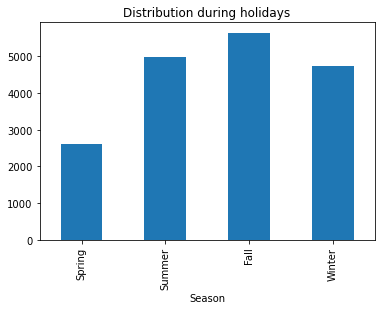

In [33]:
#Checking season sales
groupedData = dataFrame.groupby(by ='season')['cnt'].mean()
seasons=['Spring', 'Summer', 'Fall', 'Winter']#Creating season names As per my knowledge
groupedData.index=seasons
groupedData.plot(kind = 'bar')
plt.xlabel('Season')
plt.title('Distribution during holidays')

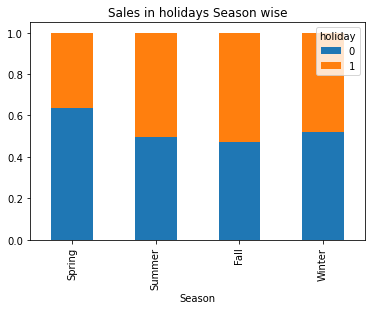

In [34]:
#Checking the same seasons with holiday Sales in stacked Bar graph
groupedData = dataFrame.groupby(by = ['season','holiday'])['cnt'].median()
groupedData = groupedData.unstack()
groupedData.index = ['Spring', 'Summer', 'Fall', 'Winter']
groupedData = groupedData.apply(lambda x: x/x.sum(),axis = 1)
groupedData.plot(kind = 'bar',stacked = True)
plt.xlabel('Season')
plt.title('Sales in holidays Season wise')
plt.show()

Eventhough there is less sales in Fall,but while we takeing the holiday sales,The fall has more sales in holiday but Not that much and spring has low sales in holiday and high sales in non -holiday (May be that season has some important school events)

**Check Year wise Sales**

I found that Year is in format of 0,1

So,i'm going to convert it into 2018,2019

After finding the sale of both year there is no use of that just drop it

In [35]:
def convert(date):
    if date ==0:
        return 2018
    elif date==1:
        return 2019

In [36]:
dataFrame['year']=dataFrame["yr"].apply(lambda x:convert(x))

<AxesSubplot:xlabel='year', ylabel='cnt'>

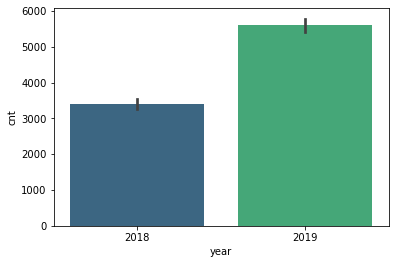

In [37]:
#Counting the sales of these year
sb.barplot('year','cnt',data=dataFrame,palette='viridis')

There is good sales in 2019,which shows the sales increae in good amount than 2018

**Working day vs holiday rentings**



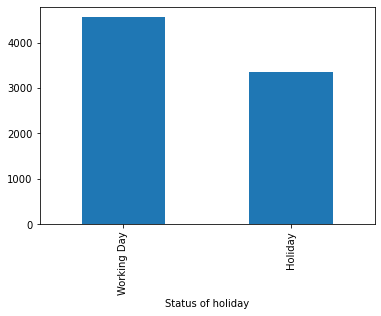

In [91]:
#Drawing Plot
data1 = dataFrame.groupby(by = ['holiday'])['cnt'].median()
data1.index = ['Working Day','Holiday']
data1.plot(kind = 'bar',stacked = True)
plt.xlabel('Status of holiday')

plt.show()

In [38]:
#Droping the year column hereafter there is no use of that
dataFrame.drop(columns="year",inplace=True)

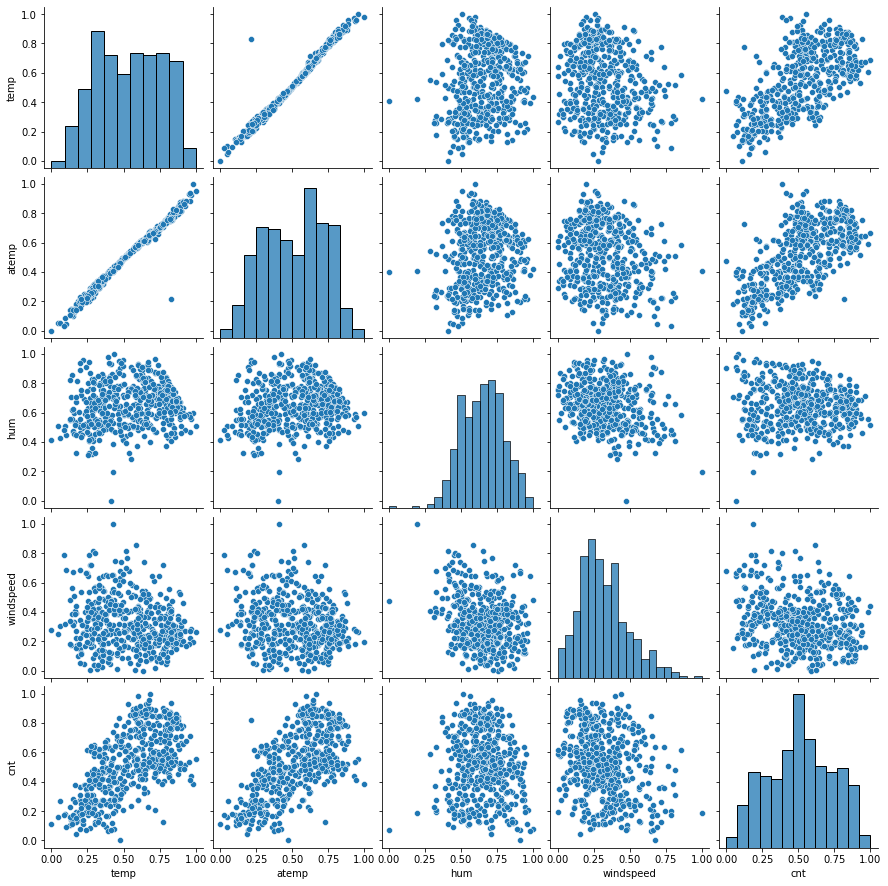

In [39]:
#Checking the co-relation between numerical values

sb.pairplot(trainData[columns])

The columns temp,atemp,cnt are having linear relationship with each other

In [40]:
trainData.drop(columns="temp",inplace=True)


**I found some varibles have high coliniarity with target variable**


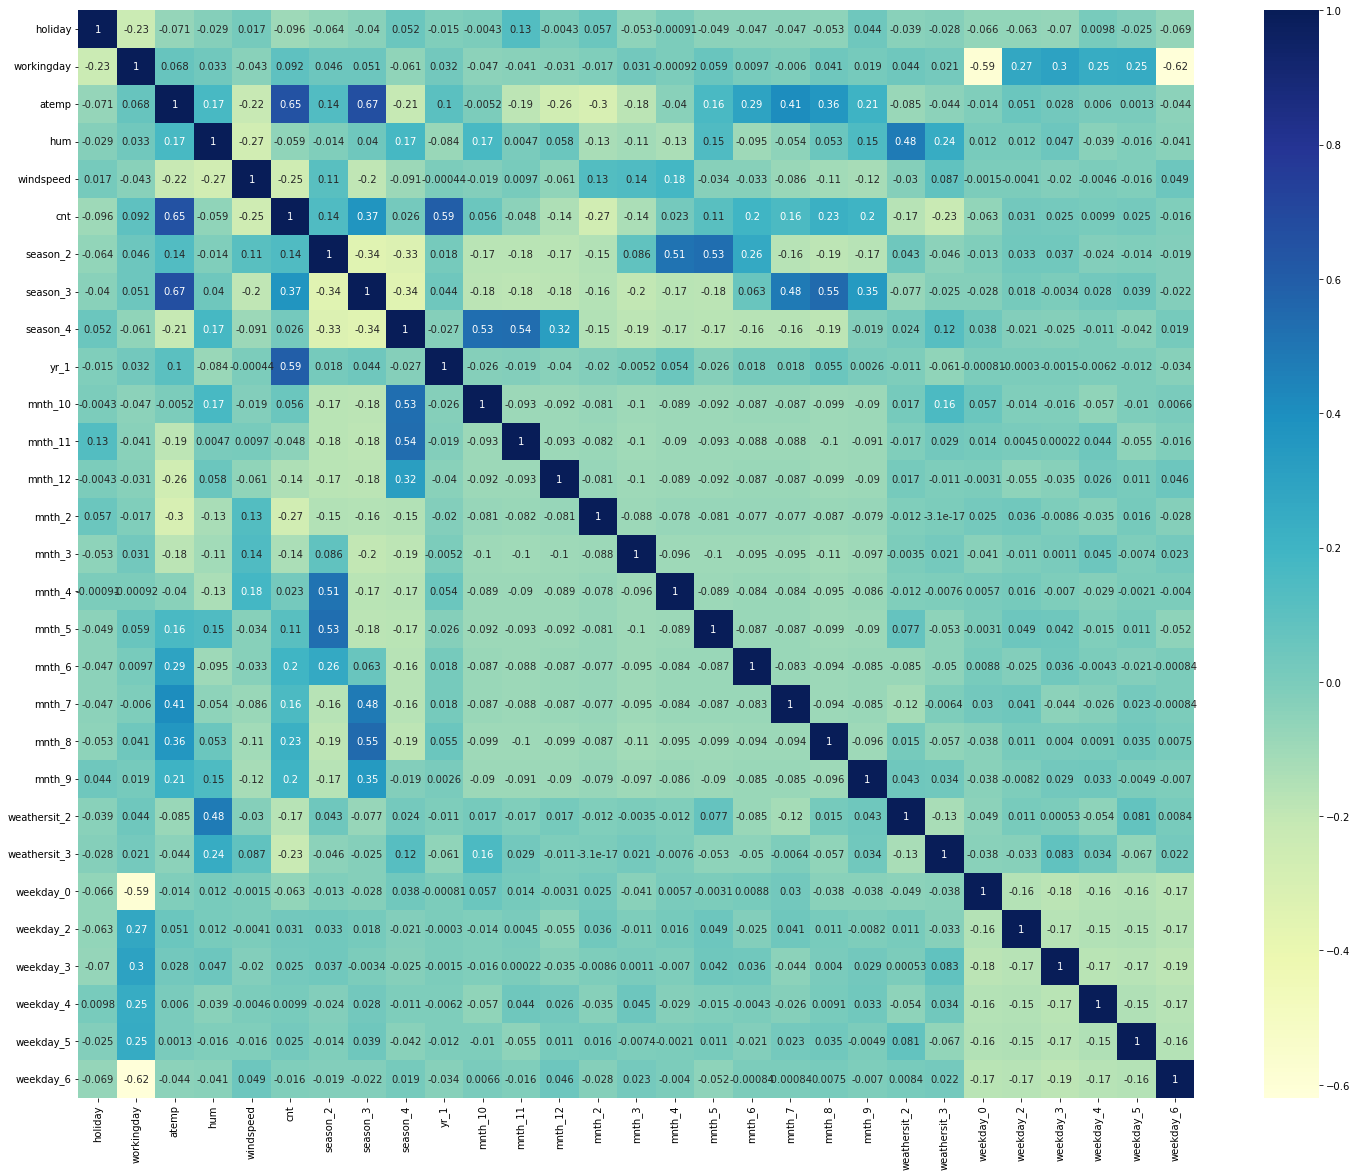

In [41]:
#Drawing the Heatmap to find co-relation coefficient
plt.figure(figsize = (25,20))
sb.heatmap(trainData.corr(), annot = True, cmap="YlGnBu")
plt.show()

I found:

    The heatmap clearly shows which variables are multicollinear in 
    nature, and which variable have high collinearity with the target variable.

# Model

Finally we reach the model part 

Here:
    Checking REF in linear Model
    Build Linear Model
    Assumption
    

#### Model building

**RFE**

Recursive feature Elimination

In [42]:
# RFE and LinearRegression

import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression#class

In [43]:

y_train = trainData.pop('cnt')
x_train = trainData

In [44]:

linearReg = LinearRegression()
linearReg.fit(x_train, y_train)

rfe = RFE(linearReg, 15) 
rfe = rfe.fit(x_train, y_train)

In [45]:
#Checking the model ranking which i'm choosing

list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('yr_1', True, 1),
 ('mnth_10', False, 2),
 ('mnth_11', False, 9),
 ('mnth_12', False, 10),
 ('mnth_2', False, 8),
 ('mnth_3', False, 4),
 ('mnth_4', False, 6),
 ('mnth_5', False, 3),
 ('mnth_6', False, 5),
 ('mnth_7', False, 7),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('weekday_0', True, 1),
 ('weekday_2', False, 14),
 ('weekday_3', False, 12),
 ('weekday_4', False, 13),
 ('weekday_5', False, 11),
 ('weekday_6', True, 1)]

In [46]:
#Checking column names which RFE Selects
RFEColumns=x_train.columns[rfe.support_]

RFEColumns

Index(['holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'yr_1', 'mnth_8', 'mnth_9', 'weathersit_2',
       'weathersit_3', 'weekday_0', 'weekday_6'],
      dtype='object')

In [47]:
#Checking Columns which RFE Rejects

x_train.columns[~rfe.support_]

Index(['mnth_10', 'mnth_11', 'mnth_12', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5'],
      dtype='object')

The above columns are RFE consider good for model

So i'm going work on it

In [48]:
#Creating DataFrame with RFE selected variable 
modelDataFrame= x_train[RFEColumns]
modelDataFrame.head()

,holiday,workingday,atemp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_8,mnth_9,weathersit_2,weathersit_3,weekday_0,weekday_6
576,0,1,0.766351,0.725633,0.264686,0,1,0,1,0,0,0,0,0,0
426,0,0,0.438975,0.640189,0.255342,0,0,0,1,0,0,1,0,0,1
728,0,0,0.200348,0.498067,0.663106,0,0,0,1,0,0,0,0,1,0
482,0,0,0.391735,0.504508,0.188475,1,0,0,1,0,0,1,0,0,1
111,0,1,0.318819,0.751824,0.380981,1,0,0,0,0,0,1,0,0,0


#### Building Model

Here I'm using the Stats library for creating model

Stats library are good to go with math type of operations

In [49]:
#And I'm going to create rfe selected columns for building models

modelDataFrame.head()

,holiday,workingday,atemp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_8,mnth_9,weathersit_2,weathersit_3,weekday_0,weekday_6
576,0,1,0.766351,0.725633,0.264686,0,1,0,1,0,0,0,0,0,0
426,0,0,0.438975,0.640189,0.255342,0,0,0,1,0,0,1,0,0,1
728,0,0,0.200348,0.498067,0.663106,0,0,0,1,0,0,0,0,1,0
482,0,0,0.391735,0.504508,0.188475,1,0,0,1,0,0,1,0,0,1
111,0,1,0.318819,0.751824,0.380981,1,0,0,0,0,0,1,0,0,0


I get some warnings while running some codes so i'm going to use the ignore error option for better visalization

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
#Adding Constant to the equations
modelDataFrame=sm.add_constant(modelDataFrame)
modelDataFrame

,const,holiday,workingday,atemp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_8,mnth_9,weathersit_2,weathersit_3,weekday_0,weekday_6
576,1.0,0,1,0.766351,0.725633,0.264686,0,1,0,1,0,0,0,0,0,0
426,1.0,0,0,0.438975,0.640189,0.255342,0,0,0,1,0,0,1,0,0,1
728,1.0,0,0,0.200348,0.498067,0.663106,0,0,0,1,0,0,0,0,1,0
482,1.0,0,0,0.391735,0.504508,0.188475,1,0,0,1,0,0,1,0,0,1
111,1.0,0,1,0.318819,0.751824,0.380981,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,1,0.824359,0.679690,0.187140,0,1,0,1,1,0,0,0,0,0
53,1.0,0,1,0.218747,0.435939,0.111379,0,0,0,0,0,0,0,0,0,0
350,1.0,0,0,0.223544,0.577930,0.431816,0,0,1,0,0,0,1,0,0,1
79,1.0,0,1,0.434043,0.759870,0.529881,1,0,0,0,0,0,1,0,0,0


In [52]:
#Running the linear model
linearModel=sm.OLS(y_train,modelDataFrame).fit()

In [53]:
#Summarize the model i get
linearModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.9
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          3.30e-188
Time:                        20:29:31   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     495   BIC:                            -926.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1578      0.022      7.147      0.000       0.114       0.201
holiday         -0.0242      0.021     -1.152      0.250      -0.066       0.017
workingday       0.0724      0.009      8.135      0.000       0.055       0.090
atemp            0.5119      0.034     15.030      0.000       0.445       0.579
hum             -0.1598      0.038     -4.208      0.000      -0.234      -0.085
windspeed       -0.1609      0.026     -6.234      0.000      -0.212      -0.110
season_2         0.1204      0.015      8.199      0.000       0.092       0.149
season_3         0.0429      0.021      2.001      0.046       0.001       0.085
season_4         0.1557      0.013     12.216      0.000       0.131       0.181
yr_1             0.2309      0.008     28.375      0.000       0.215       0.247
mnth_8           0.0522      0.018      2.962      0.003       0.018       0.087
mnth_9           0.1118      0.017      6.460      0.000       0.078       0.146
weathersit_2    -0.0580      0.011     -5.502      0.000      -0.079      -0.037
weathersit_3    -0.2399      0.027     -9.040      0.000      -0.292      -0.188
weekday_0        0.0288      0.012      2.457      0.014       0.006       0.052
weekday_6        0.0809      0.011      7.309      0.000       0.059       0.103
==============================================================================
Omnibus:                       62.631   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.969
Skew:                          -0.600   Prob(JB):                     4.54e-38
Kurtosis:                       5.579   Cond. No.                     1.09e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.28e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [54]:
# Check the parameters obtained

linearModel.params

const           0.157780
holiday        -0.024235
workingday      0.072359
atemp           0.511883
hum            -0.159833
windspeed      -0.160852
season_2        0.120353
season_3        0.042899
season_4        0.155669
yr_1            0.230900
mnth_8          0.052191
mnth_9          0.111842
weathersit_2   -0.058033
weathersit_3   -0.239932
weekday_0       0.028756
weekday_6       0.080899
dtype: float64

#### **Building the model**

Approach:

       Here I'm going to check the final model data,after checking the data,I'm going to drop the columns one 
       by one 
       
       Here I'm going to drop the columns based of High VIF and p-values
       
Eventhough if i found the **temp** columns has high VIF or p-value,i'm not droping the column,because temp is important factor for sales of bikes


**VIF**

    This one tell us how how multi-colinear,that mean how colinear the particular variable is 
    
 **p-value**
     
    it is a significance of variable,assumed probability distribution will be greater than or equal to (or less than or equal to in some instances) observed results

In [55]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = modelDataFrame.columns
vif['VIF'] = [variance_inflation_factor(modelDataFrame.values, i) for i in range(modelDataFrame.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
14,weekday_0,inf
15,weekday_6,inf
7,season_3,5.56
3,atemp,3.26
6,season_2,2.50
4,hum,1.91
8,season_4,1.89
10,mnth_8,1.68


Based on my observation of VIF and p-value

        holiday has both high pvalue and high VIF
 
This time i'm going to remove season 3 column this time

In [56]:
#Dropping the holiday column 
modelDataFrame.drop(columns="holiday",inplace=True) 

In [57]:
#checking the shape
modelDataFrame.shape

(510, 15)

Second check

In [58]:
#Creating constant

modelDataFrame=sm.add_constant(modelDataFrame)
#Running the linear model
linearModel=sm.OLS(y_train,modelDataFrame).fit()


In [59]:
#Again check the the model parameter
linearModel.params

const           0.133545
workingday      0.096594
atemp           0.511883
hum            -0.159833
windspeed      -0.160852
season_2        0.120353
season_3        0.042899
season_4        0.155669
yr_1            0.230900
mnth_8          0.052191
mnth_9          0.111842
weathersit_2   -0.058033
weathersit_3   -0.239932
weekday_0       0.052991
weekday_6       0.105134
dtype: float64

In [60]:
#Seeing model summary

linearModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.9
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          3.30e-188
Time:                        20:29:32   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     495   BIC:                            -926.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1335      0.036      3.665      0.000       0.062       0.205
workingday       0.0966      0.026      3.749      0.000       0.046       0.147
atemp            0.5119      0.034     15.030      0.000       0.445       0.579
hum             -0.1598      0.038     -4.208      0.000      -0.234      -0.085
windspeed       -0.1609      0.026     -6.234      0.000      -0.212      -0.110
season_2         0.1204      0.015      8.199      0.000       0.092       0.149
season_3         0.0429      0.021      2.001      0.046       0.001       0.085
season_4         0.1557      0.013     12.216      0.000       0.131       0.181
yr_1             0.2309      0.008     28.375      0.000       0.215       0.247
mnth_8           0.0522      0.018      2.962      0.003       0.018       0.087
mnth_9           0.1118      0.017      6.460      0.000       0.078       0.146
weathersit_2    -0.0580      0.011     -5.502      0.000      -0.079      -0.037
weathersit_3    -0.2399      0.027     -9.040      0.000      -0.292      -0.188
weekday_0        0.0530      0.027      1.937      0.053      -0.001       0.107
weekday_6        0.1051      0.027      3.862      0.000       0.052       0.159
==============================================================================
Omnibus:                       62.631   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.969
Skew:                          -0.600   Prob(JB):                     4.54e-38
Kurtosis:                       5.579   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
#Running VIF Again to check the VIF Parameters
vif = pd.DataFrame()
vif['Features'] = modelDataFrame.columns
vif['VIF'] = [variance_inflation_factor(modelDataFrame.values, i) for i in range(modelDataFrame.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif[1:]

,Features,VIF
1,workingday,9.08
14,weekday_6,6.06
13,weekday_0,5.73
6,season_3,5.56
2,atemp,3.26
5,season_2,2.50
3,hum,1.91
7,season_4,1.89
9,mnth_8,1.68
11,weathersit_2,1.57


**Here I found the Working day column contains High VIF only**

No any-other columns has both high p-value and VIF value

So i'm going to drop the workingday column

In [62]:
#Dropping workingday
modelDataFrame.drop(columns="workingday",inplace=True) 

**Third Check**

In [63]:
###Adding Constant 
modelDataFrame=sm.add_constant(modelDataFrame)

#Running the linear model
linearModel=sm.OLS(y_train,modelDataFrame).fit()


In [64]:
linearModel.params


const           0.225001
atemp           0.514892
hum            -0.161412
windspeed      -0.163028
season_2        0.122739
season_3        0.044429
season_4        0.155147
yr_1            0.231260
mnth_8          0.053240
mnth_9          0.108717
weathersit_2   -0.056026
weathersit_3   -0.234987
weekday_0      -0.039745
weekday_6       0.012237
dtype: float64

In [65]:
#Seeing summary
linearModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.2
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.28e-186
Time:                        20:29:32   Log-Likelihood:                 502.86
No. Observations:                 510   AIC:                            -977.7
Df Residuals:                     496   BIC:                            -918.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2250      0.027      8.205      0.000       0.171       0.279
atemp            0.5149      0.034     14.928      0.000       0.447       0.583
hum             -0.1614      0.038     -4.195      0.000      -0.237      -0.086
windspeed       -0.1630      0.026     -6.239      0.000      -0.214      -0.112
season_2         0.1227      0.015      8.262      0.000       0.094       0.152
season_3         0.0444      0.022      2.046      0.041       0.002       0.087
season_4         0.1551      0.013     12.019      0.000       0.130       0.181
yr_1             0.2313      0.008     28.055      0.000       0.215       0.247
mnth_8           0.0532      0.018      2.983      0.003       0.018       0.088
mnth_9           0.1087      0.018      6.206      0.000       0.074       0.143
weathersit_2    -0.0560      0.011     -5.250      0.000      -0.077      -0.035
weathersit_3    -0.2350      0.027     -8.751      0.000      -0.288      -0.182
weekday_0       -0.0397      0.012     -3.359      0.001      -0.063      -0.016
weekday_6        0.0122      0.011      1.071      0.285      -0.010       0.035
==============================================================================
Omnibus:                       76.691   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.327
Skew:                          -0.710   Prob(JB):                     4.33e-50
Kurtosis:                       5.946   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:

vif = pd.DataFrame()
vif['Features'] = modelDataFrame.columns
vif['VIF'] = [variance_inflation_factor(modelDataFrame.values, i) for i in range(modelDataFrame.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif[1:]

,Features,VIF
5,season_3,5.56
1,atemp,3.26
4,season_2,2.50
2,hum,1.91
6,season_4,1.89
8,mnth_8,1.68
10,weathersit_2,1.57
9,mnth_9,1.38
11,weathersit_3,1.25
3,windspeed,1.20


After removing the Workingday column VIF come normal

Later i found the column **weekday_6** has high p-value

So,i'm going to get rid off it

In [67]:
#Drop the weekiday_6 column which has high pValue

modelDataFrame.drop(columns="weekday_6",inplace=True) 

**Fourth Check**

In [68]:
###Adding Constant 
modelDataFrame=sm.add_constant(modelDataFrame)

#Running the linear model
linearModel=sm.OLS(y_train,modelDataFrame).fit()

In [69]:
linearModel.params

const           0.228197
atemp           0.514575
hum            -0.163082
windspeed      -0.162140
season_2        0.122589
season_3        0.044253
season_4        0.155404
yr_1            0.230950
mnth_8          0.053662
mnth_9          0.108830
weathersit_2   -0.055780
weathersit_3   -0.234370
weekday_0      -0.041927
dtype: float64

In [70]:
##Summary
linearModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.5
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.70e-187
Time:                        20:29:33   Log-Likelihood:                 502.27
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     497   BIC:                            -923.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2282      0.027      8.370      0.000       0.175       0.282
atemp            0.5146      0.034     14.917      0.000       0.447       0.582
hum             -0.1631      0.038     -4.242      0.000      -0.239      -0.088
windspeed       -0.1621      0.026     -6.207      0.000      -0.213      -0.111
season_2         0.1226      0.015      8.251      0.000       0.093       0.152
season_3         0.0443      0.022      2.038      0.042       0.002       0.087
season_4         0.1554      0.013     12.039      0.000       0.130       0.181
yr_1             0.2309      0.008     28.030      0.000       0.215       0.247
mnth_8           0.0537      0.018      3.007      0.003       0.019       0.089
mnth_9           0.1088      0.018      6.212      0.000       0.074       0.143
weathersit_2    -0.0558      0.011     -5.227      0.000      -0.077      -0.035
weathersit_3    -0.2344      0.027     -8.728      0.000      -0.287      -0.182
weekday_0       -0.0419      0.012     -3.596      0.000      -0.065      -0.019
==============================================================================
Omnibus:                       73.401   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.658
Skew:                          -0.667   Prob(JB):                     9.98e-50
Kurtosis:                       5.973   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

check the VIF

In [71]:
#Running VIF

vif = pd.DataFrame()
vif['Features'] = modelDataFrame.columns
vif['VIF'] = [variance_inflation_factor(modelDataFrame.values, i) for i in range(modelDataFrame.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif[1:]

,Features,VIF
5,season_3,5.56
1,atemp,3.26
4,season_2,2.50
2,hum,1.91
6,season_4,1.89
8,mnth_8,1.68
10,weathersit_2,1.57
9,mnth_9,1.38
11,weathersit_3,1.25
3,windspeed,1.19


I found season_3 has High VIF Value

So i'm going to delete it


In [72]:
modelDataFrame.drop(columns="season_3",inplace=True) 

In [73]:
###Adding Constant 
modelDataFrame=sm.add_constant(modelDataFrame)

#Running the linear model
linearModel=sm.OLS(y_train,modelDataFrame).fit()

In [74]:
linearModel.params

const           0.227945
atemp           0.566076
hum            -0.174176
windspeed      -0.165930
season_2        0.102343
season_4        0.140894
yr_1            0.229717
mnth_8          0.068377
mnth_9          0.121557
weathersit_2   -0.054492
weathersit_3   -0.228752
weekday_0      -0.041579
dtype: float64

In [75]:
##Summary
linearModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     231.0
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          1.36e-187
Time:                        20:29:33   Log-Likelihood:                 500.15
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     498   BIC:                            -925.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2279      0.027      8.334      0.000       0.174       0.282
atemp            0.5661      0.024     24.036      0.000       0.520       0.612
hum             -0.1742      0.038     -4.562      0.000      -0.249      -0.099
windspeed       -0.1659      0.026     -6.348      0.000      -0.217      -0.115
season_2         0.1023      0.011      9.235      0.000       0.081       0.124
season_4         0.1409      0.011     13.045      0.000       0.120       0.162
yr_1             0.2297      0.008     27.868      0.000       0.214       0.246
mnth_8           0.0684      0.016      4.176      0.000       0.036       0.101
mnth_9           0.1216      0.016      7.402      0.000       0.089       0.154
weathersit_2    -0.0545      0.011     -5.100      0.000      -0.075      -0.033
weathersit_3    -0.2288      0.027     -8.537      0.000      -0.281      -0.176
weekday_0       -0.0416      0.012     -3.556      0.000      -0.065      -0.019
==============================================================================
Omnibus:                       65.767   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.535
Skew:                          -0.602   Prob(JB):                     1.28e-43
Kurtosis:                       5.801   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
#Running VIF

vif = pd.DataFrame()
vif['Features'] = modelDataFrame.columns
vif['VIF'] = [variance_inflation_factor(modelDataFrame.values, i) for i in range(modelDataFrame.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif[1:]

,Features,VIF
2,hum,1.87
9,weathersit_2,1.56
1,atemp,1.51
7,mnth_8,1.41
4,season_2,1.38
5,season_4,1.31
10,weathersit_3,1.24
8,mnth_9,1.21
3,windspeed,1.19
6,yr_1,1.03


#### Final Thought

    The Model Looks good,the p-values are less significant and VIF are showing very low value,which means model has less Muliti collinearity, so i go for further model operation

# Residual Analysis

        Finally I've reached the part of Residual Analysis,This is Most crucial step in model
        
 

In [77]:
#Compute the Predicted Values
y_train_pred=linearModel.predict(modelDataFrame)
y_train_pred#Predicted Y values of training set

576    0.721168
426    0.497788
728    0.332714
482    0.608118
111    0.262106
         ...   
578    0.843251
53     0.257361
350    0.268576
79     0.301223
520    0.667772
Length: 510, dtype: float64

Calculate Residual

Formulae For Residual:

        R=Y_actal-Y_Predicted
  

<AxesSubplot:ylabel='Density'>

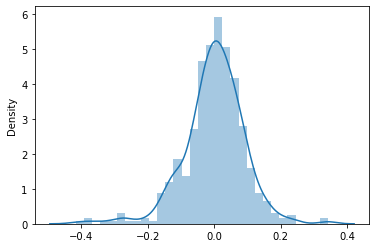

In [78]:
#Calculate Residuals
res=y_train-y_train_pred
sb.distplot(res)

Finally,Our error term are normally distributed,and most of the values are situated around 0.So,finally my model is correct

Model building is finished


## Making Prediction Using Final Model


We finished the final Model,Now We are at Final Stage,Using our model we can make the prediction and evaluation on Test data

## Test dataset

    We need to do the same set of transformation we have done in train set we need to do in test dataset as
    well


### Rescalling the test data set

1).Apply scaler() to all numeric variables in test dataset

2).This time we use transform instead of fit the dataset

3).Which means we transform the test dataset which has been already fit on the train Dataset

In [79]:
#Rescaling the test data
#Loading the column names
testColumns = ['temp', 'atemp', 'hum', 'windspeed','cnt']

#Fit on the test data
testData[testColumns]=scaler.transform(testData[testColumns])

In [80]:
#Checking the data
testData.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_8,mnth_9,weathersit_2,weathersit_3,weekday_0,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
184,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,0,...,0,0,1,0,0,0,0,0,0,0
535,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,0,...,0,0,0,0,0,0,1,0,0,0
299,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,1,0,0,0,0,1,0,0
221,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,0,...,1,0,0,0,0,0,1,0,0,0
152,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [81]:
#Descriptive statistics on test data
testData.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_8,mnth_9,weathersit_2,weathersit_3,weekday_0,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,0.236364,...,0.059091,0.086364,0.318182,0.027273,0.145455,0.168182,0.100000,0.163636,0.177273,0.118182
std,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,0.425817,...,0.236333,0.281541,0.466833,0.163248,0.353363,0.374881,0.300684,0.370789,0.382770,0.323559
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Dividing test data**

    Here I'm gonna divide the test data into x_test,and y_test for prediction 

In [82]:
#Dividing the test data
y_test=testData.pop("cnt")
X_test=testData

In [83]:
#Adding constant to make prediction
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_8,mnth_9,weathersit_2,weathersit_3,weekday_0,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
184,1.0,1,0,0.831783,0.769660,0.657364,0.084219,0,1,0,...,0,0,1,0,0,0,0,0,0,0
535,1.0,0,1,0.901354,0.842587,0.610133,0.153728,1,0,0,...,0,0,0,0,0,0,1,0,0,0
299,1.0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,1,...,0,0,1,0,0,0,0,1,0,0
221,1.0,0,1,0.881625,0.795343,0.437098,0.339570,0,1,0,...,1,0,0,0,0,0,1,0,0,0
152,1.0,0,1,0.817246,0.741471,0.314298,0.537414,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [84]:
#Selecting the columns which are present in our final train model
finalColumnsList=modelDataFrame.columns
finalColumnsList

Index(['const', 'atemp', 'hum', 'windspeed', 'season_2', 'season_4', 'yr_1',
       'mnth_8', 'mnth_9', 'weathersit_2', 'weathersit_3', 'weekday_0'],
      dtype='object')

In [85]:
finalTestDataFrame=X_test_sm[finalColumnsList]
finalTestDataFrame.head()

,const,atemp,hum,windspeed,season_2,season_4,yr_1,mnth_8,mnth_9,weathersit_2,weathersit_3,weekday_0
184,1.0,0.769660,0.657364,0.084219,0,0,0,0,0,1,0,0
535,1.0,0.842587,0.610133,0.153728,1,0,1,0,0,0,0,0
299,1.0,0.496145,0.837699,0.334206,0,1,0,0,0,1,0,0
221,1.0,0.795343,0.437098,0.339570,0,0,0,1,0,0,0,0
152,1.0,0.741471,0.314298,0.537414,1,0,0,0,0,0,0,0


In [86]:
#Making Prediction Using model
y_test_pred=linearModel.predict(finalTestDataFrame)
y_test_pred

184    0.480668
535    0.905195
299    0.393841
221    0.614070
152    0.606101
         ...   
702    0.709612
127    0.490641
640    0.779383
72     0.292935
653    0.732111
Length: 220, dtype: float64

## Evaluation 

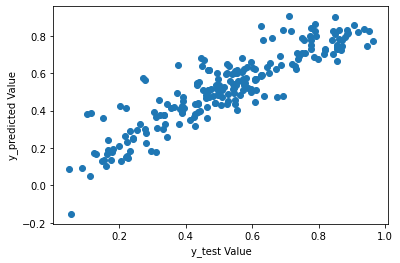

In [87]:
#Ploting the y_test and y_test_pred for better understanding
plt.scatter(y_test, y_test_pred)

plt.xlabel('y_test Value')                
plt.ylabel('y_predicted Value')

plt.show()

**R^2 Value for test Data**

In [96]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_test_pred)
r2

0.8085179748249152

**I got R^2 value as nearly 81% WHich is quite reasonable,it tell me what the test data learn from my train Data**

In [94]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7792917709824022

# Final Result

**Train Data**

    R^2 = 0.836
    
    Adjusted R^2=0.833
    
**Test Data**

    R^2 =0.808
    
    Adjusted R^2=0.779
    

# Conclusion

We have done Data cleaning, Exploratory data analysis and build Linear Regression Model to get better insights of data

->**Year** - As Per visualizing the data with year wise ,we can easily find that the **renting** is increase good number may be this happend because of popularity increase

->**Workingday** - We can say that on working days people usually prefer renting the bike. This might be because they are using it to commute to workplace

->**Seasons**- While Talking about the season the Summer and Fall has Huge sales as per my knowledge,if we give offer this month we can improve our sales
            -While we cheack the same season with workingday we can get Only spring has High working day sales,apart from this every other seasons has good number of holiday Rending 
